In [ ]:
# Import necessary libraries
import pandas as pd
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects /Project Data/HR_comma_sep.csv')  # Replace 'your_data_file.csv' with your actual data file name

In [ ]:
data.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
sales,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [ ]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

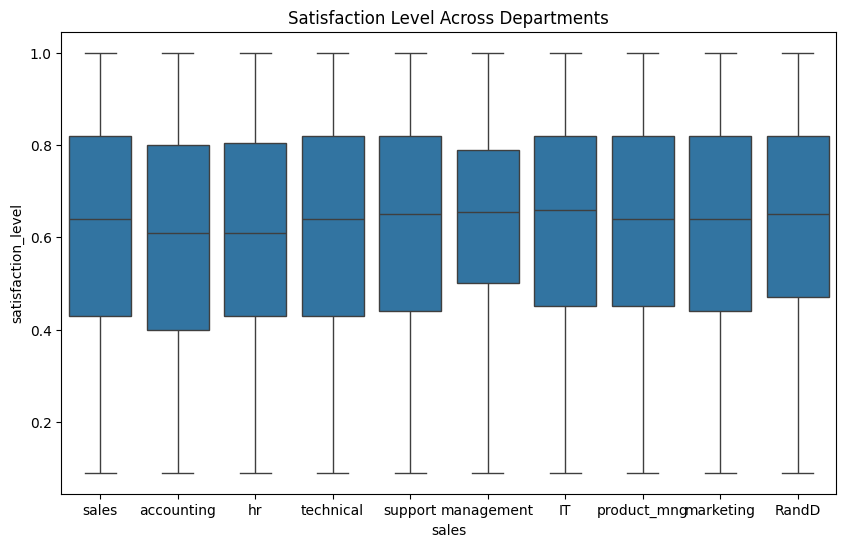

In [ ]:
# Data Exploration
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales', y='satisfaction_level', data=data)
plt.title('Satisfaction Level Across Departments')
plt.show()


# Hypothesis Formulation
# H0: No significant difference in average satisfaction level between different departments
# H1: Significant difference in average satisfaction level between at least two departments

In [ ]:
  # Perform ANOVA Test
anova_result=f_oneway(*[data['satisfaction_level'][data['sales']==department] for department in data['sales'].unique()])

In [ ]:
anova_result

F_onewayResult(statistic=2.158432169180985, pvalue=0.021865375192711502)

In [ ]:

# If ANOVA suggests significant differences, perform post-hoc tests (Tukey's HSD)
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(data['satisfaction_level'], data['sales'])
    print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
         IT       RandD   0.0017    1.0 -0.0342 0.0376  False
         IT  accounting   -0.036 0.0528 -0.0722 0.0002  False
         IT          hr  -0.0193 0.8123  -0.056 0.0173  False
         IT  management   0.0032    1.0 -0.0353 0.0418  False
         IT   marketing   0.0005    1.0 -0.0345 0.0355  False
         IT product_mng   0.0015    1.0  -0.033  0.036  False
         IT       sales  -0.0037    1.0 -0.0293 0.0219  False
         IT     support   0.0002    1.0 -0.0278 0.0281  False
         IT   technical  -0.0102 0.9728 -0.0373 0.0168  False
      RandD  accounting  -0.0377 0.0834 -0.0776 0.0022  False
      RandD          hr   -0.021  0.823 -0.0613 0.0193  False
      RandD  management   0.0015    1.0 -0.0405 0.0436  False
      RandD   marketing  -0.0012    1.0   -0.04 0.0376  False
      Ra

In [ ]:

# Perform T-test and Z-test
sales_satisfaction = data[data['sales'] == 'sales']['satisfaction_level']
technical_satisfaction = data[data['sales'] == 'technical']['satisfaction_level']

t_stat, p_value = ttest_ind(sales_satisfaction, technical_satisfaction)


chi2_result = chi2_contingency(pd.crosstab(data['promotion_last_5years'], data['sales']))

In [ ]:
print(chi2_result)

Chi2ContingencyResult(statistic=350.90858080908714, pvalue=3.970084433906707e-70, dof=9, expected_freq=array([[1200.90406027,  770.26201747,  750.68737916,  723.28288553,
         616.60110674,  839.75198347,  882.81618775, 4051.95013001,
        2181.59343956, 2662.15081005],
       [  26.09593973,   16.73798253,   16.31262084,   15.71711447,
          13.39889326,   18.24801653,   19.18381225,   88.04986999,
          47.40656044,   57.84918995]]))


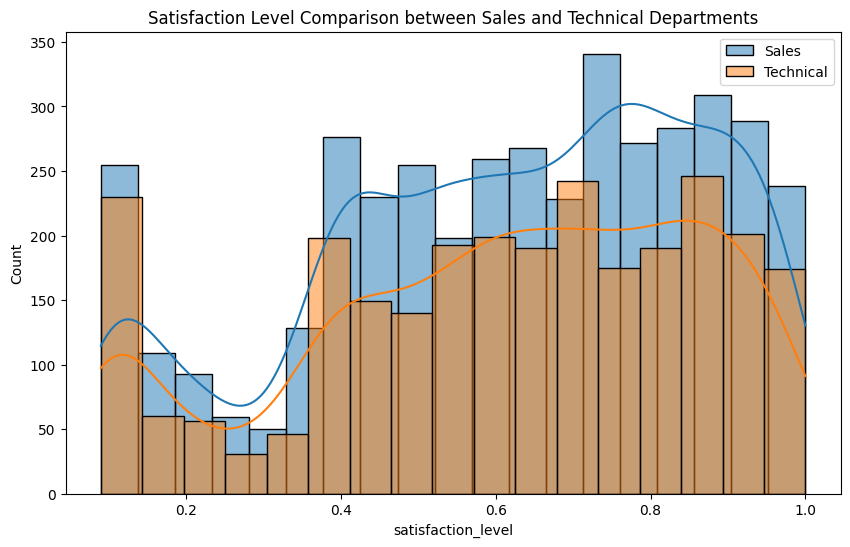

In [ ]:
# Data Visualization and Interpretation
plt.figure(figsize=(10, 6))
sns.histplot(sales_satisfaction, kde=True, label='Sales')
sns.histplot(technical_satisfaction, kde=True, label='Technical')
plt.title('Satisfaction Level Comparison between Sales and Technical Departments')
plt.legend()
plt.show()

In [ ]:
# Conclusion and Recommendations
print("ANOVA Result:", anova_result)
print("T-test Result (Sales vs. Technical):", f"T-statistic: {t_stat}, P-value: {p_value}")
print("Chi-square Result:", chi2_result)


ANOVA Result: F_onewayResult(statistic=2.158432169180985, pvalue=0.021865375192711502)
T-test Result (Sales vs. Technical): T-statistic: 1.0538002676687468, P-value: 0.29201149607000193
Chi-square Result: Chi2ContingencyResult(statistic=350.90858080908714, pvalue=3.970084433906707e-70, dof=9, expected_freq=array([[1200.90406027,  770.26201747,  750.68737916,  723.28288553,
         616.60110674,  839.75198347,  882.81618775, 4051.95013001,
        2181.59343956, 2662.15081005],
       [  26.09593973,   16.73798253,   16.31262084,   15.71711447,
          13.39889326,   18.24801653,   19.18381225,   88.04986999,
          47.40656044,   57.84918995]]))


In [ ]:
data1= data['satisfaction_level'][data['sales']=='IT']
data2= data['satisfaction_level'][data['sales']=='Sales']

In [ ]:
data1

61       0.11
62       0.10
63       0.36
64       0.11
65       0.81
         ... 
14930    0.11
14931    0.87
14932    0.39
14933    0.10
14938    0.90
Name: satisfaction_level, Length: 1227, dtype: float64

In [ ]:
data2

Series([], Name: satisfaction_level, dtype: float64)

In [ ]:
import numpy as np
from scipy.stats import zscore

# Sample data points
data = np.array([80, 85, 88, 90, 78, 92, 95, 88, 75, 82])
mean= np.mean(data)
std= np.std(data)
print(std)
print(mean)
# Calculate Z-scores
z_scores = zscore(data)

# Print Z-scores
print("Z-scores:", z_scores)

6.116371473349211
85.3
Z-scores: [-0.86652683 -0.04904869  0.4414382   0.76842946 -1.19351809  1.09542071
  1.5859076   0.4414382  -1.68400498 -0.53953558]


In [ ]:
import numpy as np
import statsmodels.stats.api as sms

# Sample data
data = np.array([25, 30, 28, 35, 32, 29, 31, 40, 38, 26])

# Calculate confidence interval (95% by default)
confidence_interval = sms.DescrStatsW(data).tconfint_mean()

# Print confidence interval
print("Confidence Interval:", confidence_interval)

Confidence Interval: (27.85996696754511, 34.940033032454885)


In [ ]:
import numpy as np
import statsmodels.stats.api as sms

# Sample data
data = np.array([25, 30, 28, 35, 32, 29, 31, 40, 38, 26])

# Calculate confidence interval (95% by default)
confidence_interval = sms.DescrStatsW(data).tconfint_mean(alpha=0.01)

# Print confidence interval
print("Confidence Interval:", confidence_interval)

Confidence Interval: (26.314356365089722, 36.485643634910275)


In [ ]:
import pandas as pd
import statsmodels.stats.api as sms

# Your DataFrame
# df = ...
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects /Project Data/hypothesis testing confidence test other data/movies_matplotlib_dataset.csv')




In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
df[df['score'].isna()].describe()

,year,score,votes,budget,gross,runtime
count,3.0,0.0,0.0,3.000000,0.0,3.000000
mean,2020.0,NaN,NaN,341666.666667,NaN,110.333333
std,0.0,NaN,NaN,570138.871972,NaN,17.616280
min,2020.0,NaN,NaN,10000.000000,NaN,90.000000
25%,2020.0,NaN,NaN,12500.000000,NaN,105.000000
50%,2020.0,NaN,NaN,15000.000000,NaN,120.000000
75%,2020.0,NaN,NaN,507500.000000,NaN,120.500000
max,2020.0,NaN,NaN,1000000.000000,NaN,121.000000


In [ ]:
df[df['score'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [ ]:
# Assuming 'score' is the column of interest
scores = df['score'].dropna()

# Calculate 95% confidence interval
confidence_interval = sms.DescrStatsW(scores).tconfint_mean()

# Print confidence interval
print("95% Confidence Interval for Scores:", confidence_interval)

95% Confidence Interval for Scores: (6.368718269381976, 6.412103648426239)


In [ ]:
import numpy as np
import statsmodels.api as sm

# Sample data
X = np.array([1, 2, 3, 4, 5])  # Independent variable
Y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# Add a constant term for the intercept
X = sm.add_constant(X)
# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Sun, 03 Mar 2024   Prob (F-statistic):              0.124
Time:                        19:02:03   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The provided output is from an Ordinary Least Squares (OLS) regression analysis. Let's break down the key elements of the results:

Dependent Variable (Dep. Variable: y): The variable being predicted or explained in the model.

R-squared (R-squared:): R-squared is a measure of how well the independent variable(s) explain the variability in the dependent variable. In this case, R-squared is 0.600, meaning that approximately 60% of the variability in the dependent variable is explained by the independent variable(s).

Adjusted R-squared (Adj. R-squared:): Adjusted R-squared is a modified version of R-squared that takes into account the number of predictors in the model. It penalizes for adding irrelevant predictors. In this case, it's 0.467.

F-statistic (F-statistic:): The F-statistic tests the overall significance of the regression model. It compares the fit of the intercept-only model with the fit of the full model. A higher F-statistic indicates a more significant overall model. The value here is 4.500.

Prob (F-statistic) (Prob (F-statistic):): This is the p-value associated with the F-statistic. A low p-value (typically below 0.05) suggests that the overall regression model is statistically significant. Here, the p-value is 0.124, which is higher than the conventional significance level of 0.05.

Coefficients (coef): These are the estimated coefficients for the intercept (const) and the independent variable (x1). The model is represented as y = 2.2000 + 0.6000 * x1.

Standard Errors (std err): These are estimates of the standard deviation of the coefficients. They provide a measure of the uncertainty or variability associated with the coefficient estimates.

t-values (t): The t-values indicate the number of standard deviations the coefficient estimate is from zero. Larger absolute t-values suggest more evidence against the null hypothesis.

P-values (P>|t|): These are the p-values associated with the t-values. Low p-values indicate that the corresponding coefficients are significantly different from zero.

Confidence Intervals ([0.025 0.975]): These are the 95% confidence intervals for the coefficients. They provide a range of values within which we can be reasonably confident that the true coefficients lie.

Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis (Omnibus:, Durbin-Watson:, Jarque-Bera (JB):, Skew:, Kurtosis:): These are diagnostic statistics that assess various assumptions of the regression model, such as normality, homoscedasticity, and independence of errors.

AIC and BIC (AIC:, BIC:): AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are measures of the model's goodness of fit. Lower values indicate a better fit, but these should be compared between models to determine the best-fitting one.

Df Residuals and Df Model (Df Residuals:, Df Model:): Degrees of freedom for residuals and the model, respectively.

Covariance Type (Covariance Type:): Specifies the method used to estimate the covariance matrix of the coefficients. In this case, it's "nonrobust," meaning standard OLS was used.

This output provides a comprehensive summary of the regression analysis, allowing you to assess the model's performance and the significance of the individual coefficients.

OLS stands for "Ordinary Least Squares" in the context of regression analysis. It is a method used to estimate the parameters (coefficients) of a linear regression model by minimizing the sum of the squared differences between the observed and predicted values. In other words, OLS aims to find the line (or hyperplane in multiple dimensions) that best fits the given data points by minimizing the sum of the squared vertical distances (residuals) from each data point to the line. This method is widely used in linear regression to find the best-fitting line and is the foundation for linear regression analysis.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Your movie dataset
# Assuming you have the dataset stored in a DataFrame named 'movies'
# If not, you can create one with your data
# For example:
# movies = pd.DataFrame({your_data_here})
movies= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects /Project Data/hypothesis testing confidence test other data/movies_matplotlib_dataset.csv')
movies= movies.dropna()
# Extract relevant columns
votes = movies['votes']
scores = movies['score']

# Add a constant term for the intercept
votes = sm.add_constant(votes)

# Fit the regression model
model = sm.OLS(scores, votes).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     1573.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          3.50e-302
Time:                        19:04:48   Log-Likelihood:                -6795.1
No. Observations:                5421   AIC:                         1.359e+04
Df Residuals:                    5419   BIC:                         1.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1076      0.014    450.062      0.0

# t_statistics

In [ ]:
from scipy.stats import ttest_1samp
# Given data
data = [1,2,-3,4,-5,6,-7,-8,-9,-10]
# Hypothesized population mean
mu = 4
# Calculate t-statistic and p-value
t_statistic, p_value = ttest_1samp(data, mu)
if p_value<0.05:
    print('Alternative Hypothesis')
else:
    print('Null hypothesis')

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

Alternative Hypothesis
t-statistic: -3.7736294416002836
p-value: 0.004391853396927584


In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
data = [1,2,-3,4,-5,6,-7,-8,-9,-10]
mu= np.min(data)
t_test, p_value= ttest_1samp(data,mu)
print(p_value)
if p_value<=0.05:
    print('alternative hypothesis')
else:
    print('null hypothesis')

0.0037143168071759472
alternative hypothesis


In [ ]:
import pandas as pd
import scipy.stats as stats
# Assuming your dataset is named 'movies_df'
movies_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects /Project Data/hypothesis testing confidence test other data/movies_matplotlib_dataset.csv')
# Extract relevant data for Comedy and Action movies in 1980
comedy_ratings = movies_df[(movies_df['genre'] == 'Drama') & (movies_df['year'] == 2019)]['score']
action_ratings = movies_df[(movies_df['genre'] == 'Animation') & (movies_df['year'] == 2019)]['score']
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(comedy_ratings, action_ratings)
# Check if the p-value is less than 0.05
if p_value < 0.05:
    print("Results are statistically significant")
else:
    print("Results are not statistically significant")
print(p_value)

Results are not statistically significant
0.372816446317614


In [ ]:
import pandas as pd
import scipy.stats as stats
# Assuming your dataset is named 'movies_df'
movies_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects /Project Data/hypothesis testing confidence test other data/movies_matplotlib_dataset.csv')
# Extract relevant data for Comedy and Action movies in 1980
comedy_ratings = movies_df[(movies_df['genre'] == 'Drama') & (movies_df['year'] == 2019)]['score']
action_ratings = movies_df[(movies_df['genre'] == 'Animation') & (movies_df['year'] == 2019)]['score']
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(comedy_ratings, action_ratings)
# Check if the p-value is less than 0.05
if p_value < 0.05:
    print("Results are statistically significant")
else:
    print("Results are not statistically significant")
print(p_value)

Results are not statistically significant
0.372816446317614


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects /Project Data/hypothesis testing confidence test other data/movies_matplotlib_dataset.csv')
data = data.dropna(subset=['budget', 'gross'])
# Perform a paired t-test
t_stat, p_value = ttest_rel(data['budget'], data['gross'])
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test Statistic: -31.134434292975847
P-value: 5.650927070053748e-196
Reject the null hypothesis.


In this example:

    group1 and group2 are two independent samples with normal distributions.
    The ttest_ind function is used to perform the two-sample independent t-test.
    The t_statistic is the calculated t-statistic, and the p_value is the p-value associated with the test.
    Finally, the code checks if the p-value is less than 0.05 (a common significance level) to determine if the difference between the two groups is statistically significant.

This is a basic example, and in a real-world scenario, you would replace the randomly generated samples with your actual data.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
# Your data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects /Project Data/hypothesis testing confidence test other data/movies_matplotlib_dataset.csv')
# Drop rows with NaN values in 'budget' or 'gross' columns
data = data.dropna(subset=['budget', 'gross'])
# Perform a one-sample t-test
mean= np.mean(data['gross'])

t_stat, p_value = ttest_1samp(data['gross'], mean)
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')
# Set your significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between budget and gross.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between budget and gross.")


Test Statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis. There is no significant difference between budget and gross.
